In [59]:
from IPython.display import Audio
import librosa
import os

In [60]:
def cut_song(song):
    start = 0
    end = len(song)
    song_pieces = []
    while start + 100000 < end:
        song_pieces.append(song[start:start+100000])
        start += 100000
    return song_pieces

def prepare_song(song_path):
    list_matrices = []
    y,sr = librosa.load(song_path,sr=22050)
    song_pieces = cut_song(y)
    for song_piece in song_pieces:
        melspec = librosa.feature.melspectrogram(song_piece)
        list_matrices.append(melspec)
    return list_matrices

In [61]:
import warnings
warnings.simplefilter('ignore')

all_tracks = []
genre = []
directory = '/home/morten/Documents/Soundfiles/ad/'

for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([1]*len(song_pieces))
    print(f"Finished: {song_name}")

directory = '/home/morten/Documents/Soundfiles/noad'
for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([0]*len(song_pieces))
    print(f"Finished: {song_name}")

Finished: 1de,-de-viceguide-ChineseResearchersClaimtoCreatetheFirstGene-EditedBabies.wav
Finished: 3nor,-nor-bbcfood-Productdeveloper.wav
Finished: 1nor,-nor-viceguide-TheseArtistsWantBlackPeopletoSleep.wav
Finished: 3de,-de-viceguide-TruvadaMayBeGettingUnfairlyBlamedfortheSpreadofSTDs.wav
Finished: 5nor,-nor-bbcfood-Foodcontenteditor.wav
Finished: 3eng,-eng-viceguide-TrumpIsaHealthHazardtoHisSupporters.wav
Finished: 1eng,-eng-viceguide-TheManyObsessionsThatCanHauntaPersonwithOCD.wav
Finished: 1nor,-nor-bbcfood-BONUSCOOKALONGfennel,pomegranate&broadbeansalad.wav
Finished: 1eng,-eng-dndisfornerds-StoriesofTheGreyhillFreeCompanyE42DescentintoWater.wav
Finished: 5nor,-nor-vicegaming-Episode457-AFungusAmongUs.wav
Finished: 3nor,-nor-dndisfornerds-StoriesofTheGreyhillFreeCompanyE36Run!.wav
Finished: 3nor,-nor-vicegaming-Episode455-JailforWillyWonka.wav
Finished: 1eng,-eng-vicegaming-Waypoints48-Yellowjackets,TheExpanse,andRob'sMotorsportsMania.wav
Finished: 3nor,-nor-viceguide-Howthe'Mandel

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks),
                                                    np.array(genre),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)


(5016, 128, 196)
(1236, 128, 196)
(1236, 128, 196)
(5016, 128, 196, 1)


In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 196, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 194, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 95, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 45, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 80640)            

In [66]:
from tensorflow.keras.optimizers import RMSprop

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10


2022-04-25 10:27:34.480093: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 503365632 exceeds 10% of free system memory.


157/157 [==============================] - 45s 282ms/step - loss: 7.7145 - accuracy: 0.4934 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/10
157/157 [==============================] - 44s 279ms/step - loss: 7.7067 - accuracy: 0.4946 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
157/157 [==============================] - 44s 279ms/step - loss: 7.7067 - accuracy: 0.4946 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
157/157 [==============================] - 44s 281ms/step - loss: 7.7067 - accuracy: 0.4946 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
157/157 [==============================] - 44s 281ms/step - loss: 7.7067 - accuracy: 0.4946 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
157/157 [==============================] - 44s 282ms/step - loss: 7.7067 - accuracy: 0.4946 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/10
157/157 [==============================] - 44s 282ms/step - loss: 7.7067 - accuracy: 0.4946 - val_loss: 7.6246 - val_accuracy: 0.5

39/39 - 2s - loss: 7.4889 - accuracy: 0.5089 - 2s/epoch - 53ms/step


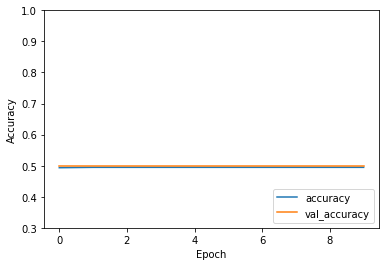

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [73]:
predictions = model.predict(X_test[:10])
print("pred shape", predictions.shape)

pred shape (10, 1)


In [74]:
predgenre = np.argmax(predictions,axis=1)
print(predgenre)
#print(genre)

[0 0 0 0 0 0 0 0 0 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,